## REI602M Machine Learning - Homework 1
### Due: Sunday 24.1.2021

**Objectives**: Python, NumPy and Matplotlib warmup, gradient descent, linear regression

**Name**: (Alexander Guðmundsson), **email:** (alg35@hi.is), **collaborators:** ()

Please provide your solutions by filling in the appropriate cells in this notebook, creating new cells as needed. Hand in your solution in PDF format on Gradescope. Make sure that you are familiar with the course rules on collaboration (encouraged) and copying (very, very, bad!)

This assignment is somewhat time consuming so start early.

1) [Python warmup, 15 points] The following code implements the matrix-vector product $y=Ax$ where $A$ is an $n \times m$ matrix, $x$ is a column vector with $m$ elements and $y$ a column vector with $n$ elements, $y_i = \sum_{k=1}^m A_{ik}x_k$. (Note that in practice one would use NumPy's `dot` function to perform the matrix-vector multiplication).

*Note*: A useful Python/Nympy tutorial which covers most everything we need in REI602M can be found here: https://cs231n.github.io/python-numpy-tutorial/

In [2]:
import numpy as np

def matvecmul(A, x):
    # Computes the matrix-vector product Ax using elementwise operations
    n, m = A.shape
    assert(m == x.shape[0])
    y=np.zeros(n)
    for i in range(0, n):
        for j in range(0, m):
            y[i] = y[i] + A[i,j] * x[j]
    return y

# Test
A=np.array([[1, 2], [3, 4]])
x=np.array([5, 41])
print(matvecmul(A,x)) # Outputs [87, 179]

[ 87. 179.]


a) Write a Python function which computes the sum of each row in the matrix $A$, i.e. $y_i = \sum_{j=1}^m A_{ij},~i=1,\ldots,n$, by accessing individual matrix/vector elements directly as is done in the `matvecmul` function above.

In [3]:
import numpy as np

def rowsum(A):
    rs = []
    for i in A:
        s = sum(i)
        rs.append(s)
    
    return rs

# Test
A=np.array([[1, 2, 3], [3, 4, -5]])
print("rowsum(A) :", rowsum(A)) # Outputs [6, 2]

rowsum(A) : [6, 2]


b) Modify the `rowsum` function so that only positive elements are included in the sum, again by accessing individual matrix elements.

In [4]:
import numpy as np

def rowsumpos(A):
    rsp = []
    for i in A:
        s = sum(i)
        if s > 0:
            rsp.append(s)
    return rsp

# Test
A=np.array([ [1, 2, 3], [3, 4, -5] ])
print("rowsumpos(A) :", rowsumpos(A)) # Outputs [6, 2]
# Test2
B = np.array([[1, 2, 3], [3, -4, -5]])
print("rowsumpos(B) :", rowsumpos(B)) # Outputs [6]

rowsumpos(A) : [6, 2]
rowsumpos(B) : [6]


c) Compute the matrix product $C=AB$ where $A$ is $n \times m$, $B$ is $m \times p$ and $C_{ij} = \sum_{k=1}^m A_{ik} B_{kj}$ is $n \times p$, by calling `matvecmul` repeatedly.

In [5]:
import numpy as np

def matmul(A,B):
    C = []
    #Using Xline x YColumn assuming X == A || B and Y == A || B
    x = [] #will be the array of all the columns in the array that has more lines
    Anew = [] # will be the array of the lines in the array that has less lines
    
    if len(A) > len(B):
        for i in range(len(A[0])):
            temp = [c[i] for c in A]
            Anew.append(temp) #creating an array of columns in A
        x = B
    
    else:
        for i in range(len(B[0])):
            temp = [c[i] for c in B]
            Anew.append(temp) #creating an array of columns in B
        x = A
        
        
    # now we can create the output array by looping through the columns by calling matvecmul
    
    for k in x:
        tempArr = matvecmul(np.asarray(Anew), np.asarray(k))
        C.append(tempArr)
    
    return C

# Test
A1=np.array([[1, 2, 3], [4, 5, 6] ])
B1=np.array([[7, 10], [8, 11], [9, 12]])
print("matmul(A1, B1) :", matmul(A1, B1)) # Outputs [[50, 68], [122,167]]

# Test 2
A2=np.array([[7, 10], [8, 11], [9, 12]])
B2=np.array([[1, 2, 3], [4, 5, 6] ])
print("matmul(A2, B2) :", matmul(A2, B2)) # Outputs [[50, 68], [122,167]]


matmul(A1, B1) : [array([50., 68.]), array([122., 167.])]
matmul(A2, B2) : [array([50., 68.]), array([122., 167.])]


2) [NumPy warmup, 15 points] Repeat a), b) and c) in 1) using NumPy functionality. Aim for fast code by avoiding for-loops as much as possible.

In [6]:
import numpy as np

def rowsum(A):
    rs = np.asarray(np.sum(A,axis=1).tolist()) #using numpy sum to find the sum of each axis
    return rs
    
def rowsumpos(A):
    rsp = np.asarray(np.sum(A, axis=1).tolist())
    rsp = rsp[np.where(rsp>0)] # removing all elements less than 0
    return rsp
    
def matmul(A,B):
    #Using Xline x YColumn assuming X == A || B and Y == A || B
    C = np.array([])
    if len(A) > len(B):
        C = np.dot(B,A)
    else:
        C = np.dot(A,B)
        
    return C


# Test rowsum(A)
A=np.array([[1, 2, 3], [3, 4, -5]])
print("rosum(A) :", rowsum(A)) # Outputs [6, 2]

# Test rowsumpos(A)
A=np.array([ [1, 2, 3], [3, 4, -5] ])
print("rowsumpos(A) :", rowsumpos(A)) # Outputs [6, 2]

# Test2 rowsumpos(A)
B = np.array([[1, 2, 3], [3, -4, -5]])
print("rowsumpos(B) :", rowsumpos(B)) # Outputs [6]

# Test matmul(A, B)
A1=np.array([[1, 2, 3], [4, 5, 6] ])
B1=np.array([[7, 10], [8, 11], [9, 12]])
print("matmul(A1, B1) :", matmul(A1, B1)) # Outputs [[50, 68], [122,167]]

# Test 2 matmul(A, B)
A2=np.array([[7, 10], [8, 11], [9, 12]])
B2=np.array([[1, 2, 3], [4, 5, 6] ])
print("matmul(A2, B2) :", matmul(A2, B2)) # Outputs [[50, 68], [122,167]]



rosum(A) : [6 2]
rowsumpos(A) : [6 2]
rowsumpos(B) : [6]
matmul(A1, B1) : [[ 50  68]
 [122 167]]
matmul(A2, B2) : [[ 50  68]
 [122 167]]


3) [Linear regression with gradient descent, 40 points] Here you implement a gradient descent algorithm for linear regression and apply it to a small data set. You then add code to track the minimization process. For many learning algorithms this is a very important part of the training process.

a) [30 points] Create a function `linreg_gd` which implements gradient descent for linear regression with the least squares cost function, using maximum number of iterations as a stop criteria.  See the lecture notes for details and the Jupyter notebook `vika01_demo` on Canvas. Try to avoid Python for-loops as much as possible by using NumPy functionality in your final implementation.

Use your function to fit a linear regression model on the form
$$
f_\theta(x)=\theta_0 + \sum_{j=1}^p \theta_j x_j
$$
to the `Avertising_centered` dataset provided with this notebook.

*Note 1*: You can use the `linear_reg` dataset used in the `vika01_demo` notebook to debug your code. Write the $\theta$ values to the screen every iteration (or every 100 or 1000 or ...) to monitor convergence. You can compare the output of your code with the values you get by solving the normal equations directly.

*Note 2*: You may want to begin by implementing a version that does not rely heavily on NumPy. Once you get it working, gradually introduce NumPy operations into the code.

*Note 3*: The advertising dataset is discussed in the ISLR textbook (see sections 2.1, 3.1 and 3.2). Here the data has been transformed by subtracting the mean of each input variable and dividing by its standard deviation so that all inputs now have mean zero and standard deviation one (more on this later in the course). As a result, gradient descent converges faster to the optimal $\theta$ values but note that the values now differ from those reported in the book.

$(\theta_0, \theta_1, \theta_2, \theta_3) = $ ( ... insert your results here ... )

(200, 4)
[[ 1.00e+00  9.70e-01  9.82e-01  1.78e+00]
 [ 1.00e+00 -1.20e+00  1.08e+00  6.70e-01]
 [ 1.00e+00 -1.52e+00  1.53e+00  1.78e+00]
 [ 1.00e+00  5.20e-02  1.22e+00  1.29e+00]
 [ 1.00e+00  3.94e-01 -8.42e-01  1.28e+00]
 [ 1.00e+00 -1.62e+00  1.73e+00  2.05e+00]
 [ 1.00e+00 -1.05e+00  6.44e-01 -3.25e-01]
 [ 1.00e+00 -3.13e-01 -2.47e-01 -8.72e-01]
 [ 1.00e+00 -1.62e+00 -1.43e+00 -1.36e+00]
 [ 1.00e+00  6.16e-01 -1.40e+00 -4.31e-01]
 [ 1.00e+00 -9.45e-01 -1.18e+00 -2.92e-01]
 [ 1.00e+00  7.90e-01  4.97e-02 -1.22e+00]
 [ 1.00e+00 -1.44e+00  7.99e-01  1.63e+00]
 [ 1.00e+00 -5.79e-01 -1.06e+00 -1.08e+00]
 [ 1.00e+00  6.66e-01  6.51e-01  7.11e-01]
 [ 1.00e+00  5.65e-01  1.65e+00  1.03e+00]
 [ 1.00e+00 -9.25e-01  9.00e-01  3.84e+00]
 [ 1.00e+00  1.57e+00  1.10e+00  1.16e+00]
 [ 1.00e+00 -9.09e-01 -1.87e-01 -5.64e-01]
 [ 1.00e+00  3.01e-03  4.29e-02 -5.27e-01]
 [ 1.00e+00  8.33e-01  3.00e-01  1.05e+00]
 [ 1.00e+00  1.06e+00 -1.23e+00 -3.25e-01]
 [ 1.00e+00 -1.56e+00 -4.97e-01  8.77e-01]
 [

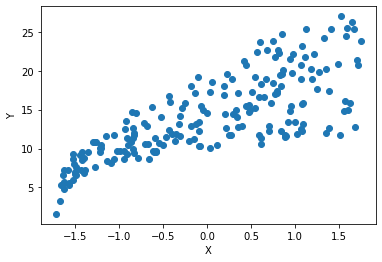

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def linreg_gd(X, y):
    # Insert your code here
    # ...
    return theta

# Load the data

#TV,Radio,Newspaper,Sales
data = np.genfromtxt('./Advertising_centered.csv', delimiter=',', 
                     skip_header=1) 
print(data.shape)

n = data.shape[0]

y = data[:,-1]

X = np.c_[np.ones(n), data[:,0:-1]]

print(X)
print(data)


plt.scatter(X[:,1],y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Insert code here
# ...

# Call your function and report theta values
# ...

b) [10 points] Create a plot that shows the value of the cost function, $J(\theta)$ in each iteration when you apply your gradient descent function to the data in `Advertising_centered`.

*Note*: Create a vector J with k_max elements where k_max is the maximum number of iterations. Use `matplotlib.pyplot.plot` or `matplotlib.pyplot.semilogy` to create the figure.

In [ ]:
# Insert code to generate figure here
# ...

4) [An alternative cost function for linear regression, 30 points]

The least-squares cost function
$$
    J(\theta) = \frac{1}{2}\sum_{i=1}^n (f_\theta(x^{(i)}) - y^{(i)})^2
$$
is the workhorse of linear regression but it has a significant drawback, namely it is sensitive to 'outliers', data points that differ significantly from the rest. If the prediction, $f_\theta(x^{(i)})$ differes considerably from the true value $y^{(i)}$, the squared difference will have a large contribution to $J(\theta)$, magnifying the effect of outlier points. Using the absolute error $|f_\theta(x^{(i)}) - y^{(i)})|$ instead of the squared error, reduces the effects of outliers but the price to pay is the optimization becomes more difficult.

The *log-cosh* cost function
$$
    J(\theta) = \sum_{i=1}^n \log \cosh (f_\theta(x^{(i)}) - y^{(i)})
$$
alleviates the outlier problem to some extent by behaving like the squred error when the difference between model predictions and data is small but like the absolute error when the difference is large. The log-cosh function is differentiable and can be used in gradient descent algorithms.

*Note 1*: Outliers in data can arise for many reasons, they can e.g. represent faulty measurements or simply be due to high variability in the data. Detecting outliers prior to fitting a machine learning model is in general not trivial. A machine learning algorithm should preferrably be robust to the presence of (few) outliers in the data.

a) [10 points] Derive the gradient for the *log-cosh* cost function

*Note 1*: Start with the case $n=1$. The case $n \geq 1$ follows by noting that the derivative of a sum of functions is equal to the sum of their derivatives.

*Note 2*: You can use the LaTeX support in the Jupyter/Colab notebooks (see e.g. this notebook for examples) or simply write down your solution on paper, take a photo with your phone and include as an image below using

`<img src="mynd.png" alt="drawing" width="300"/>`

Insert derivation here
...

b) [20 points] Implement a gradient descent algorithm for linear regression that uses the *log-cosh* cost function by modifying your code from problem 3). Test your code on the `outlier.csv` data set using the model
$$
f_\theta(x)=\theta_0 + \theta_1 x_1
$$
and compare the results by applying least squares regression to the same data. Create a scatter plot of the data that includes the two regression lines in the plot (see `v01_demo`). What can you conclude from this (single) experiment?

$(\theta_0, \theta_1) = $ ( ... insert your results here ... )

In [ ]:
def linreg_gd_logcosh(X, y):
    # Insert your code here
    # ...
    return theta

# Load data
# ...

# Call your function
# ...

# Draw a figure to compare the results with the least squares solution
# ...